4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28)
Epoch 1/50
750/750 - 3s - loss: 0.8902 - accuracy: 0.7333 - val_loss: 0.6112 - val_accuracy: 0.8004
Epoch 2/50
750/750 - 2s - loss: 0.5483 - accuracy: 0.8222 - val_loss: 0.5111 - val_accuracy: 0.8310
Epoch 3/50
750/750 - 2s - loss: 0.4829 - accuracy: 0.8410 - val_loss: 0.4682 - val_accuracy: 0.8438
Epoch 4/50
750/750 - 2s - loss: 0.4482 - accuracy: 0.8497 - val_loss: 0.4421 - val_accuracy: 0.8492
Epoch 5/50
750/750 - 2s - loss: 0.4256 - accuracy: 0.8574 - val_loss: 0.4229 - val_accuracy: 0.8529
Epoch 6/50
750/750 - 2s - loss: 0.4088 - accuracy: 0.8612 - val_loss: 0.4104 - val_accuracy: 0.8565
Epoch 7/50
750/750 - 2s - loss: 0.3957 - accuracy: 0.8662 - val_loss: 0.4006 - val_accuracy: 0.8593
Epoch 8/50
750/750 - 2s - loss: 0.3848 - accuracy: 0.8689 - val_loss: 0.3880 - val_accuracy: 0.8642
Epoch 9/50
750/750 - 2s - loss: 0.3759 - accuracy: 0.8718 - val_loss: 0.3830 - val_accuracy: 0.8633
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


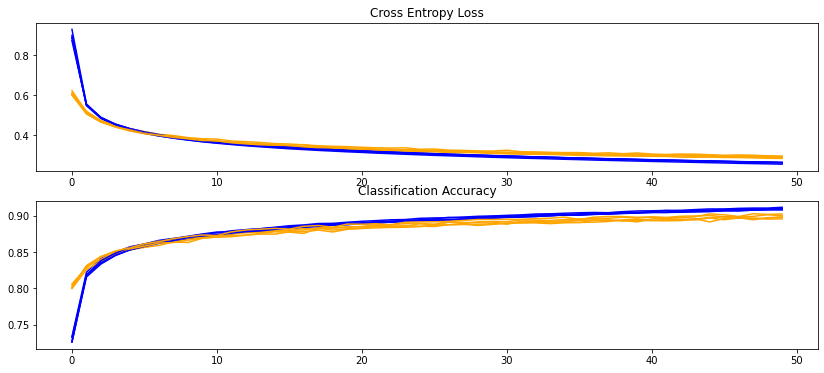

In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adadelta, Adam, SGD
from sklearn.model_selection import train_test_split

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	print(trainX.shape)
	print(testX.shape)
	      
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

#cnn model with Tanh
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='tanh', kernel_initializer='he_uniform'))
  # model.add(Dropout(rate=0.3))
  model.add(Dense(10, activation='softmax'))
	# compile
  opt = Adadelta(lr=0.01)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model
 
# evaluate the model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows of train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		

		# fit
		history = model.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=2)
		# evaluate 
		_, acc = model.evaluate(testX, testY, verbose=2)
		print('Accuracy> %.2f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

pyplot.figure(figsize=(14,6))
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()
 
 
# run the code
def run_test():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)


run_test()